numpy자체는 모델링이나 과학계산을 위한 기능을 제공하지 않으므로 먼저 Numpy배열과 배열기반 연산에 대한 이해를 한 다음 pandas 같은 배열 기반 도구를 사용하면 훨씬 더 효율적이다.

파이썬 산술계산 영역에서 중요한 위치를 차지하는 이유 중 하나는 대용량 데이터 배열을 효율적으로 다룰 수 있도록 설계되었다는 점이다.

# 4.1 NumPy ndarray:多次元配列

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [7]:
%time for _ in range(10) : my_arr2 = my_arr*2

Wall time: 27 ms


In [8]:
%time for _ in range(10) : my_list2 = [x*2 for x in my_list]

Wall time: 666 ms


In [9]:
data = np.random.randn(2,3)
data

array([[ 1.29947376, -0.10312767,  0.5609965 ],
       [ 1.54443684, -1.10192712, -1.56539621]])

In [10]:
data*10

array([[ 12.99473757,  -1.0312767 ,   5.60996505],
       [ 15.44436845, -11.01927119, -15.65396211]])

In [11]:
data + data

array([[ 2.59894751, -0.20625534,  1.12199301],
       [ 3.08887369, -2.20385424, -3.13079242]])

In [13]:
data.shape

(2, 3)

In [14]:
data.dtype

dtype('float64')

## 4.1.1 ndarray

In [16]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
print(arr1)
print(arr1.dtype)

[6.  7.5 8.  0.  1. ]
float64


같은 길이를 가지는 리스트를 내표하고 있는 순차 데이터는 다차원 배열로 변환 가능하다

In [20]:
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
print(arr2.ndim)
print(arr2.shape)
print(arr2.dtype)
print(arr2)

2
(2, 4)
int32
[[1 2 3 4]
 [5 6 7 8]]


In [22]:
print(np.zeros(10))
print(np.zeros((3,6)))
print(np.zeros((2,3,2)))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]]


In [23]:
# arange는 python의 range함수의 배열 버전이다
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 4.1.2 ndarrayのdtype

In [24]:
arr1 = np.array([1,2,3], dtype=np.float64)
arr2 = np.array([1,2,3], dtype=np.int32)

In [25]:
print(arr1.dtype)
print(arr2.dtype)

float64
int32


ndarrayのastypeメソッドを利用して配列のdtypeを違う形に変換(casting)

In [27]:
arr = np.array([1,2,3,4,5])
print(arr.dtype)
float_arr = arr.astype(np.float64)
print(float_arr.dtype)

int32
float64


In [28]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
print(arr)
print(arr.dtype)
print(arr.astype(np.int32))

[ 3.7 -1.2 -2.6  0.5 12.9 10.1]
float64
[ 3 -1 -2  0 12 10]


숫자 형식의 문자열을 담고 있는 배열이 있다면 astype을 사용하여 숫자로 변환할 수 있다.

In [29]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype = np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [30]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

## 4.1.3 NumPy배열의 산술 연산

In [31]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [32]:
arr*arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [33]:
arr-arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [34]:
1/arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [35]:
arr**0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [36]:
arr2 = np.array([[0., 4., 1.],[7., 2., 12.]])

In [37]:
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

같은 크기를 가지는 배열 간의 비교 연산은 불리언 배열을 반환한다.

In [38]:
arr2>arr

array([[False,  True, False],
       [ True, False,  True]])

## 4.1.4 색인과 슬라이싱 기초

In [40]:
arr = np.arange(10)
print(arr)
print(arr[5])
print(arr[5:8])

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]


In [42]:
arr[5:8] = 12
print(arr)
arr_slice = arr[5:8]
print(arr_slice)

[ 0  1  2  3  4 12 12 12  8  9]
[12 12 12]


In [47]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(arr2d[2])
# 2차원 배열에서 각 색인에 해당하는 요소는 스칼라값이 아니라 1차원 배열이다.
# 개별요소는 콤마로 구분된 색인리스트로 넘긴다.
print(arr2d[0][2])
print(arr2d[0,2])
print(arr2d[:2, 1:])

[7 8 9]
3
3
[[2 3]
 [5 6]]


In [6]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[-2.33152071  1.19738593 -0.41281944  0.02816428]
 [ 1.76683208  0.22957052  0.39093013  1.04542736]
 [ 0.22584062  1.52175092  0.77502836 -0.52825332]
 [-1.6747252   0.58486743 -0.98165768  0.61404838]
 [-1.27436272  1.32437243 -0.4933508   1.01254772]
 [-2.9229025   1.24268368 -0.0105453   1.18007827]
 [-0.25831041 -0.95643536 -0.54848212 -0.91561535]]


In [13]:
# 불리언 배열은 반드시 색인하려는 축의 길이와 동일한 길이를 가져야 한다. 불리언 배열은 배열의 색인으로 사용할 수 있다.
print(names=='Bob')
print(data[names=='Bob'])
print(data[~(names=='Bob')]) # ~연산자는 일반적인 조건을 반대로 쓰고 싶을 때

[ True False False  True False False False]
[[-2.33152071  1.19738593 -0.41281944  0.02816428]
 [-1.6747252   0.58486743 -0.98165768  0.61404838]]
[[ 1.76683208  0.22957052  0.39093013  1.04542736]
 [ 0.22584062  1.52175092  0.77502836 -0.52825332]
 [-1.27436272  1.32437243 -0.4933508   1.01254772]
 [-2.9229025   1.24268368 -0.0105453   1.18007827]
 [-0.25831041 -0.95643536 -0.54848212 -0.91561535]]


In [11]:
data[names=='Bob', 2:] #names=='Bob'인 row에서 2:컬럼을 선택

array([[-0.41281944,  0.02816428],
       [-0.98165768,  0.61404838]])

## 4.1.6 fancy indexing

- 팬시 색인은 정수 배열을 사용한 색인을 설명하시 위해 Numpy에서 차용한 단어다.

In [14]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [15]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [16]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [21]:
arr = np.arange(32).reshape((8,4))
print(arr)
print(arr[[1, 5, 7, 2],[0, 3, 1, 2]]) #팬시색인의 결과는 항상 1차원이다.
print(arr[[1, 5, 7, 2]][:,[0, 3, 1, 2]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
[ 4 23 29 10]
[[ 4  7  5  6]
 [20 23 21 22]
 [28 31 29 30]
 [ 8 11  9 10]]


In [22]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [23]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [25]:
np.dot(arr.T, arr) #행렬의 내적

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

In [26]:
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [27]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [28]:
arr.swapaxes(1,2) # 두개의 축번호를 받아서 배열을 뒤바꾼다.

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

# 4.2 ufunc:배열의 각 원소를 빠르게 처리하는 함수

In [31]:
arr = np.arange(10)
print(arr)
print(np.sqrt(arr))
print(np.exp(arr))

[0 1 2 3 4 5 6 7 8 9]
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


In [32]:
x = np.random.randn(8)
y = np.random.randn(8)
print(np.maximum(x, y)) # x, y의 원소별로 가장 큰 값을 계산

[ 1.14824365  1.37493603 -0.04063665  0.67927808  0.49619148  1.44172946
 -0.07594479  0.88870314]


In [34]:
arr = np.random.randn(7)*5
print(arr)
r = np.random.randn(7)*5
print(arr)
remainder, whole_part = np.modf(arr) # 분수를 받아서 몫과 나머지를 함께 반환
print(remainder)
print(whole_part)

[ 6.34924591 -6.14332266  0.07548468  1.41644034 -6.62010779 -6.89626922
 -6.99467983]
[ 6.34924591 -6.14332266  0.07548468  1.41644034 -6.62010779 -6.89626922
 -6.99467983]
[ 0.34924591 -0.14332266  0.07548468  0.41644034 -0.62010779 -0.89626922
 -0.99467983]
[ 6. -6.  0.  1. -6. -6. -6.]


In [35]:
print(arr)
print(np.sqrt(arr))
print(np.sqrt(arr, arr))

[ 6.34924591 -6.14332266  0.07548468  1.41644034 -6.62010779 -6.89626922
 -6.99467983]
[2.519771          nan 0.27474476 1.19014299        nan        nan
        nan]
[2.519771          nan 0.27474476 1.19014299        nan        nan
        nan]
ipykernel_launcher:2: RuntimeWarning: invalid value encountered in sqrt
ipykernel_launcher:3: RuntimeWarning: invalid value encountered in sqrt


# 4.3 배열을 이용한 배열지향 프로그래밍

In [36]:
points = np.arange(-5, 5, 0.01) # -5부터 4.99까지 0.01씩 증가하는 값들의 배열
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [37]:
z = np.sqrt(xs**2 + ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2+y^2}$ for a grid of values')

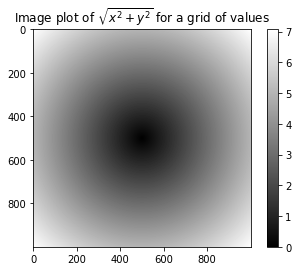

In [39]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2+y^2}$ for a grid of values")

## 4.3.1 배열 연산으로 조건절 표현하기

In [40]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [41]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [43]:
arr = np.random.randn(4, 4)
print(arr)
print(arr>0)
print(np.where(arr>0, 2, -2))

[[ 0.43564258 -0.37551557  1.66939451 -1.23570849]
 [-0.26316232 -0.87357866  0.88983444  1.62377704]
 [ 0.47416846 -0.63281821  1.43400272 -0.82871158]
 [-0.26459764 -0.06641861 -0.2965215  -1.70041853]]
[[ True False  True False]
 [False False  True  True]
 [ True False  True False]
 [False False False False]]
[[ 2 -2  2 -2]
 [-2 -2  2  2]
 [ 2 -2  2 -2]
 [-2 -2 -2 -2]]


In [44]:
np.where(arr>0, 2, arr) #양수인 경우에만 2를 대입한다.

array([[ 2.        , -0.37551557,  2.        , -1.23570849],
       [-0.26316232, -0.87357866,  2.        ,  2.        ],
       [ 2.        , -0.63281821,  2.        , -0.82871158],
       [-0.26459764, -0.06641861, -0.2965215 , -1.70041853]])

## 4.3.2 수학 메서드와 통계 메서드

In [45]:
arr = np.random.randn(5, 4)
arr

array([[-0.44626575, -0.45212007, -0.68851618,  0.37815641],
       [-1.29144423, -0.36389201, -0.78938998,  0.6554372 ],
       [-0.29820792,  0.32394821, -0.65920402,  0.64410541],
       [ 0.78663898,  0.45445929,  1.15263179,  0.50696903],
       [ 0.50101447,  0.79175609,  0.01697577,  0.10867527]])

In [46]:
print(arr.mean())
print(np.mean(arr))
print(arr.sum())
print(arr.mean(axis=1))
print(arr.sum(axis=0))

0.0665863872104813
0.0665863872104813
1.3317277442096258
[-0.3021864  -0.44732226  0.00266042  0.72517477  0.3546054 ]
[-0.74826445  0.7541515  -0.96750262  2.29334331]


In [47]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [49]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
print(arr)
print(arr.cumsum(axis=0))
print(arr.cumprod(axis=1))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
[[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


## 4.3.3 불리언 배열을 위한 메서드

In [50]:
arr = np.random.randn(100)
(arr>0).sum()

54

In [51]:
bools = np.array([False, False, True, False])
print(bools.any()) # 하나이상의 값이 True인지 검사
print(bools.all()) # 모든 원소가 True인지 검사

True
False


## 4.3.4 정렬

In [53]:
arr = np.random.randn(6)
print(arr)
arr.sort()
print(arr)

[-0.9731062  -1.28139816 -1.15924865 -1.27912748  0.30296236 -0.7441557 ]
[-1.28139816 -1.27912748 -1.15924865 -0.9731062  -0.7441557   0.30296236]


In [54]:
arr = np.random.randn(5,3)
print(arr)
arr.sort(1)
print(arr)

[[ 0.35324765 -0.60129861 -2.24547383]
 [-0.84600955 -0.72119374 -0.44435337]
 [-0.08859592  0.09455818 -0.3028756 ]
 [-2.1315358   0.03659616 -1.43625425]
 [ 0.1891804   0.57355311 -0.58349737]]
[[-2.24547383 -0.60129861  0.35324765]
 [-0.84600955 -0.72119374 -0.44435337]
 [-0.3028756  -0.08859592  0.09455818]
 [-2.1315358  -1.43625425  0.03659616]
 [-0.58349737  0.1891804   0.57355311]]


In [55]:
large_arr = np.random.randn(100)
large_arr.sort()
large_arr[int(0.05*len(large_arr))] #5%분위수

-1.4631296745229199

## 집합 관련 함수

In [57]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names))
print(sorted(set(names)))

['Bob' 'Joe' 'Will']
['Bob', 'Joe', 'Will']


In [59]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2,3,6])
# 두개의 배열을 인자로 받아서 첫번째 배열의 원소가 두번째 배열의 원소를 포함하는지 나타내는 불리언 배열을 반환

array([ True, False, False,  True,  True, False,  True])

## 4.4 배열 데이터의 파일 입출력

In [60]:
arr = np.arange(10)
np.save('some_array', arr)

In [61]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 4.5 선형대수

In [63]:
x = np.array([[1., 2., 3.],[4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7],[8, 9]])

In [64]:
print(x)
print(y)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]


In [66]:
print(x.dot(y))
print(np.dot(x, y))

[[ 28.  64.]
 [ 67. 181.]]
[[ 28.  64.]
 [ 67. 181.]]


In [68]:
print(np.dot(x, np.ones(3)))
print(x @ np.ones(3))

[ 6. 15.]
[ 6. 15.]


In [69]:
from numpy.linalg import inv, qr

In [70]:
X = np.random.rand(5, 5)
mat = X.T.dot(X) # X.T.의 전치행렬과 X의 곱 계산

In [71]:
inv(mat) # 정사각 행렬의 역행렬 계산

array([[  343.48724327, -1292.16593277,  -422.40118055,  1041.23969551,
          667.3197522 ],
       [-1292.16593277,  4936.68516576,  1615.22121233, -3984.35404705,
        -2556.29881449],
       [ -422.40118055,  1615.22121233,   532.25306692, -1305.97184218,
         -837.60435088],
       [ 1041.23969551, -3984.35404705, -1305.97184218,  3218.73831482,
         2063.87349889],
       [  667.3197522 , -2556.29881449,  -837.60435088,  2063.87349889,
         1325.24272291]])

In [72]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -9.09494702e-13,  0.00000000e+00,
         4.54747351e-13,  6.82121026e-13],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -4.54747351e-13, -4.54747351e-13],
       [-2.27373675e-13,  0.00000000e+00,  1.00000000e+00,
         4.54747351e-13,  2.27373675e-13],
       [ 0.00000000e+00, -1.36424205e-12, -2.27373675e-13,
         1.00000000e+00,  2.27373675e-13],
       [ 2.27373675e-13,  9.09494702e-13,  0.00000000e+00,
         9.09494702e-13,  1.00000000e+00]])

In [74]:
q, r = qr(mat) # qr분해를 계산
r

array([[-1.91628580e+00, -3.52803967e+00, -2.54753344e+00,
        -2.45583580e+00, -3.62634500e+00],
       [ 0.00000000e+00, -3.04424245e-01, -3.25736577e-01,
        -4.44569712e-01, -1.00732679e-01],
       [ 0.00000000e+00,  0.00000000e+00, -3.68849262e-01,
        -1.94250432e-01,  6.95505187e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -3.67183588e-01,  5.72382348e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.70197230e-04]])

## 4.6 난수 생성

In [77]:
samples = np.random.normal(size=(4, 4))
samples

array([[-0.44931037,  0.50081922,  0.65975127, -1.03069044],
       [ 1.37648475, -0.39215593, -1.24841284,  0.77893803],
       [-0.14383883,  0.12084207, -0.01988994,  2.02627636],
       [-0.93088338,  0.24234268,  0.6927841 ,  0.01931787]])

In [78]:
from random import normalvariate

In [79]:
N = 1000000

In [80]:
%timeit sampls = [normalvariate(0, 1) for _ in range(N)]

540 ms ± 16.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [81]:
%timeit np.random.normal(size=N)

19.5 ms ± 429 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [82]:
np.random.seed(1234)

In [83]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

### Exercise

In [84]:
import random

In [85]:
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

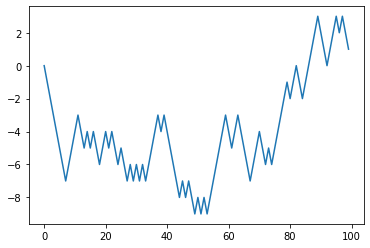

In [86]:
 plt.plot(walk[:100])

In [87]:
nsteps = 1000
draws = np.random.randint(0, 2, size = nsteps)
steps = np.where(draws>0, 1, -1)
walk = steps.cumsum()

In [89]:
print(walk.min())
print(walk.max())

-9
60


In [90]:
(np.abs(walk)>=10).argmax()

297

In [92]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws>0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]], dtype=int32)

In [93]:
print(walks.max())
print(walks.min())

122
-128


In [94]:
hits30 = (np.abs(walks)>=30).any(1)
print(hits30)
print(hits30.sum())

[ True  True  True ...  True False  True]
3368


In [95]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

509.99762470308787